{994: 2526, 354: 1716, 1604: 5757, 1512: 5523, 1288: 4015, 1481: 5985, 714: 2137, 500: 1585, 141: 395, 143: 473, 2000: 8099, 628: 2136, 148: 250, 885: 5216, 150: 481, 24: 24, 404: 1348, 218: 811, 125: 137, 350: 1314, 1908: 6664}
{10: {'MSI': {994: 10143.9237594604, 354: 777.1813869476322, 1604: 53424.1170883179, 1512: 47645.5280780792, 1481: 50662.9645824432, 404: 814.7728443145749, 500: 1430.41467666626, 628: 2852.30469703674, 141: 76.6661167144775, 714: 3890.59042930603, 143: 195.027351379395, 2000: 150016.307353973, 1288: 37884.751081466704, 148: 82.8139781951904, 885: 11032.189846038802, 150: 71.5644359588623, 24: 7.837772369384771, 1908: 85302.276134491, 218: 210.60299873352105, 125: 46.1111068725586, 350: 1171.4189052581798}}, 100: {'MSI': {994: 1128834.6333503698, 354: 60243.685245513894, 1604: 5930594.1774845105, 1512: 5651719.07401085, 1481: 5882079.14662361, 404: 112138.84377479601, 500: 136500.347137451, 628: 273508.399248123, 141: 6035.082817077639, 714: 461760.76149940497,

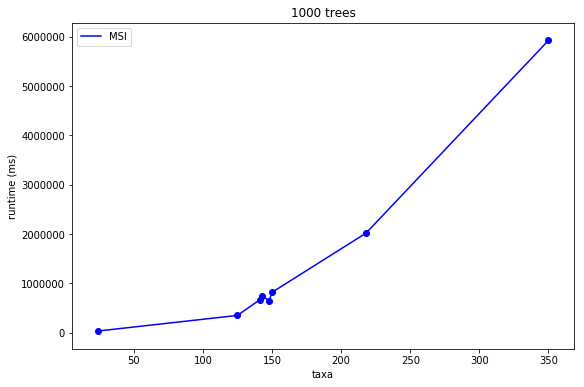

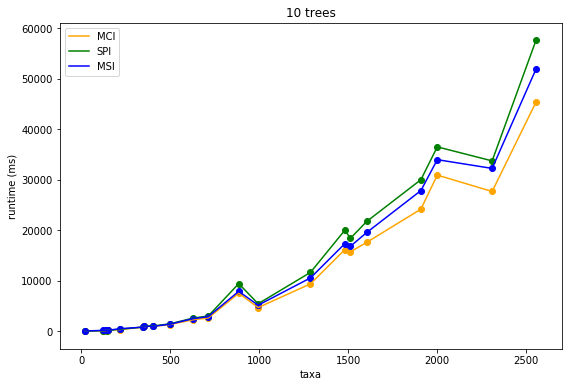

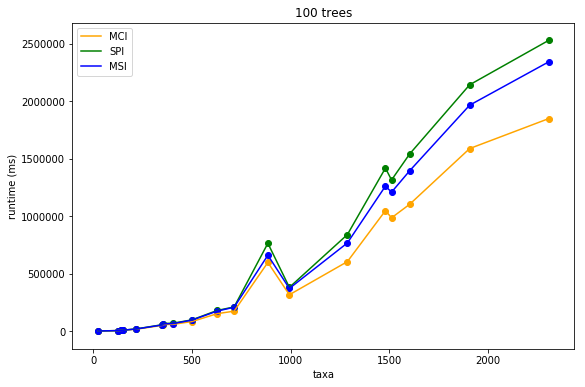

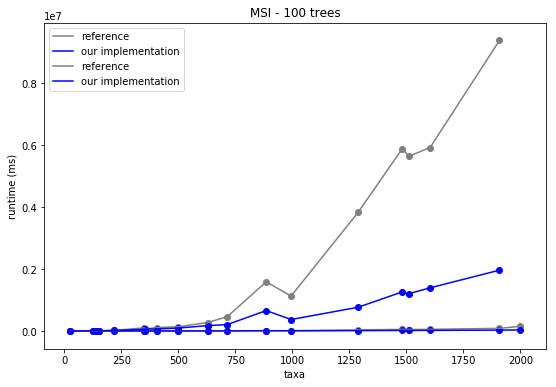

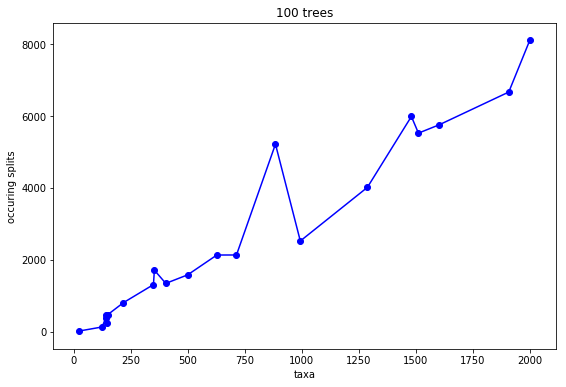

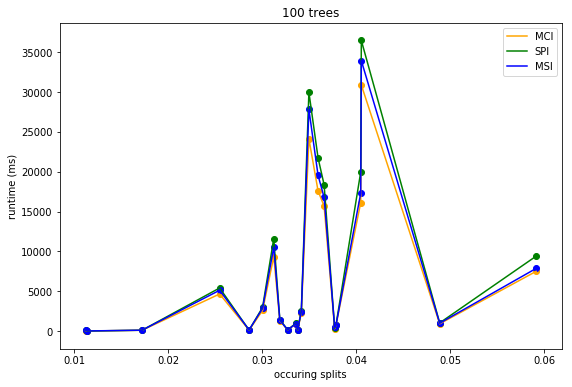

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
color_dict = {}
color_dict['MSI'] = "blue"
color_dict['SPI'] = "green"
color_dict['MCI'] = "orange"

csv_df = pd.read_csv('../benchmark/robin_full.csv', sep=',', header=None)
#values[10][24]['MSI']
values = {}
for row in csv_df.iterrows():
    instance_name = row[1][0].split('/')[-1]
    trees = int(instance_name.split('-')[0])
    taxa = int(instance_name.split('-')[1])
    metric = row[1][1]
    runtime = float(row[1][2])
    if not (trees in values):
        values[trees] = {}
    if not (metric in values[trees]):
        values[trees][metric] = {}
    values[trees][metric][taxa] = runtime;
    
unique_df = pd.read_csv('../benchmark/unique', delim_whitespace=True, header=None)
#unique[24]
uniques = {}
for row in unique_df.iterrows():
    uniques[int(row[1][0])] = int(row[1][1])
print(uniques)


reference_df = pd.read_csv('../benchmark/msi-reference.txt', sep=' ')
#references[10][24]['MSI']
references = {}
for row in reference_df.iterrows():
    instance_name = row[1][0].split('/')[-1]
    trees = int(instance_name.split('-')[0])
    taxa = int(instance_name.split('-')[1])
    metric = row[1][2]
    runtime = float(row[1][1]) * 1000
    if not (trees in references):
        references[trees] = {}
    if not (metric in references[trees]):
        references[trees][metric] = {}
    references[trees][metric][taxa] = runtime;
print(references)

#separate set of plots for different tree set sizes
plt.rcParams["figure.figsize"] = (9, 6)
for trees in values:
    plt.title(str(trees) + ' trees')
    plt.xlabel('taxa')
    plt.ylabel('runtime (ms)')
    #separate line per metric
    for metric, results in values[trees].items():
        x_values = [taxa for taxa, runtime in results.items()]
        y_values = [runtime for taxa, runtime in results.items()]
        sort_index = np.argsort(x_values)
        x_values = [x_values[sort_index[i]] for i in range(len(sort_index))]
        y_values = [y_values[sort_index[i]] for i in range(len(sort_index))]
        plt.plot(x_values ,y_values, label = metric, color = color_dict[metric])
        plt.scatter(x_values, y_values, color = color_dict[metric])
    plt.legend()
    plt.savefig('output/metric_runtimes_' + str(trees) + "_trees" )
    plt.show()
    
plt.rcParams["figure.figsize"] = (9, 6)
for trees in references:
    for metric in references[trees]:
        plt.title(metric + ' - ' + str(trees) + ' trees')
        plt.xlabel('taxa')
        plt.ylabel('runtime (ms)')
        x_values = []
        y_values = []
        y_values2 = []
        for taxa, runtime in references[trees][metric].items():
            if taxa in values[trees][metric]:
                x_values.append(taxa)
                y_values.append(runtime)
                y_values2.append(values[trees][metric][taxa])
        sort_index = np.argsort(x_values)
        x_values = [x_values[sort_index[i]] for i in range(len(sort_index))]
        y_values = [y_values[sort_index[i]] for i in range(len(sort_index))]
        y_values2 = [y_values2[sort_index[i]] for i in range(len(sort_index))]
        plt.plot(x_values ,y_values, label = 'reference', color = 'grey')
        plt.scatter(x_values, y_values, color = 'grey')
        plt.plot(x_values ,y_values2, label = 'our implementation', color = 'blue')
        plt.scatter(x_values, y_values2, color = 'blue')
        plt.legend()
        plt.savefig('output/reference_comparison' + metric + '_' + str(trees) + "_trees" )
        plt.show()
    
plt.title(str(trees) + ' trees')
plt.xlabel('taxa')
plt.ylabel('occuring splits')
results = values[10]['MSI']
x_values = []
y_values = []
for taxa, runtime in results.items():
    if taxa in uniques:
        x_values.append(taxa)
        y_values.append(uniques[taxa])
sort_index = np.argsort(x_values)
x_values = [x_values[sort_index[i]] for i in range(len(sort_index))]
y_values = [y_values[sort_index[i]] for i in range(len(sort_index))]
plt.plot(x_values ,y_values, label = metric, color = color_dict[metric])
plt.scatter(x_values, y_values, color = color_dict[metric])
plt.savefig('output/splits_' + str(trees) + "_trees" )
plt.show()
    
    
plt.title(str(trees) + ' trees')
plt.xlabel('occuring splits')
plt.ylabel('runtime (ms)')
for metric, results in values[10].items():
    x_values = []
    y_values = []
    for taxa, runtime in results.items():
        if taxa in uniques:
            x_values.append(uniques[taxa] / (1.0*trees*(taxa-3)))
            y_values.append(runtime)
    sort_index = np.argsort(x_values)
    x_values = [x_values[sort_index[i]] for i in range(len(sort_index))]
    y_values = [y_values[sort_index[i]] for i in range(len(sort_index))]
    plt.plot(x_values ,y_values, label = metric, color = color_dict[metric])
    plt.scatter(x_values, y_values, color = color_dict[metric])
plt.legend()
plt.savefig('output/metric_runtimes_splits_' + str(trees) + "_trees" )
plt.show()
    
        